# Линейные методы в машинном обучении

Загрузим необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Линейная регрессия

Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ y = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где у - целевая переменная (что мы хотим предсказать), $x_i$ -- признак объекта х, $w_i$ -- вес i-го признака, b -- bias (смещение, свободный член)

Часто предполагают, что объект х содержит в себе фиктивный признак, который всегда равен 1, тогда bias это есть вес этого признака. В этом случае формула принимает простой вид:
$$ y = <w, x>. $$

В матричной форме, в случае, когда у нас есть n объектов формулу можно переписать следующим образом:
$$ Y = Xw,$$
Y -- вектор размера n, X -- матрица объекты-признаки размера $n \times k$, w -- вектор весов размера k.

Решение по методу наименьших квадратов дает 
$$ w = (X^TX)^{-1}X^TY $$

Сгенерируем искусственные данные. 

In [2]:
from sklearn.model_selection import train_test_split

In [5]:
np.random.randn(10) * 10

array([ -7.09373147,   3.45996376, -18.15960648,   2.41088745,
         5.11802435,  -4.66267277,  13.5468048 ,   5.9326026 ,
        -7.63821458,  -0.11255931])

In [14]:
np.random.seed(0)

X = np.linspace(-5, 5, 20)
y = 10 * X - 7

X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

y_train = y_train + np.random.randn(10) * 10
y_test = y_test + np.random.randn(10) * 10

Визуализируем данные, используя библиотеку matplotlib.

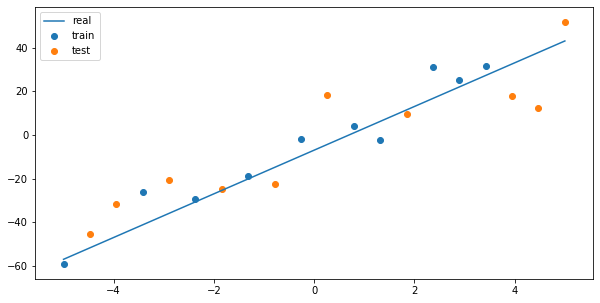

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.show()

Обучим нашу модель на тренировочной выборке и предскажем значения на тесте.
Предсказанные ответы сохраним в переменную $\textbf{predictions}$, а веса модели сохраним в переменные $\textbf{w}$, $b$.

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

model.fit(X_train, y_train)

w = model.coef_
b = model.intercept_

In [18]:
w, b

(array([10.11878743]), -2.9747839385400496)

Визуализируем предсказания.

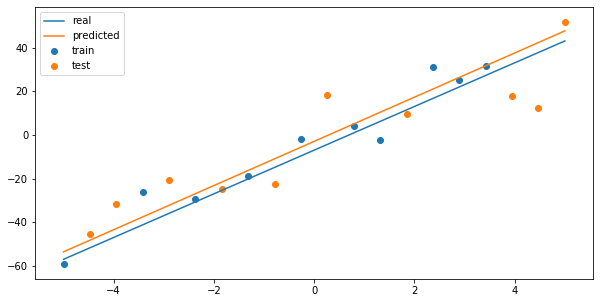

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, X.reshape(-1, 1).dot(w) + b, label='predicted')
plt.legend()
plt.show()

## Оценка результатов

Вычислим среднеквадратичную ошибку на трейне и на тесте. Также вычислим среднюю абсолютную ошибку.

In [20]:
from sklearn.metrics import mean_squared_error

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

print('Train MSE: ', mean_squared_error(y_train, y_train_predicted))
print('Test MSE: ', mean_squared_error(y_test, y_test_predicted))

Train MSE:  45.245301329287436
Test MSE:  207.77732571553466


In [21]:
from sklearn.metrics import mean_absolute_error

print('Train MAE: ', mean_absolute_error(y_train, y_train_predicted))
print('Test MAE: ', mean_absolute_error(y_test, y_test_predicted))

Train MAE:  5.0363184672964305
Test MAE:  11.843444464685117


In [22]:
from sklearn.metrics import r2_score

print('Train MAE: ', r2_score(y_train, y_train_predicted))
print('Test MAE: ', r2_score(y_test, y_test_predicted))

Train MAE:  0.942107850322528
Test MAE:  0.7415758899454855


# Реальный датасет

Будем работать с датасетом boston. Этот датасет описывает средние цены на недвижимость в районах Бостона в $1000. 
Примеры признаков города: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д.

Загрузим датасет, выведем информацию

In [23]:
from sklearn.datasets import load_boston

In [24]:
house_data = load_boston()

In [26]:
print(house_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [27]:
X = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = house_data['target']

In [29]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Визуализируем распределения признаков в датасете

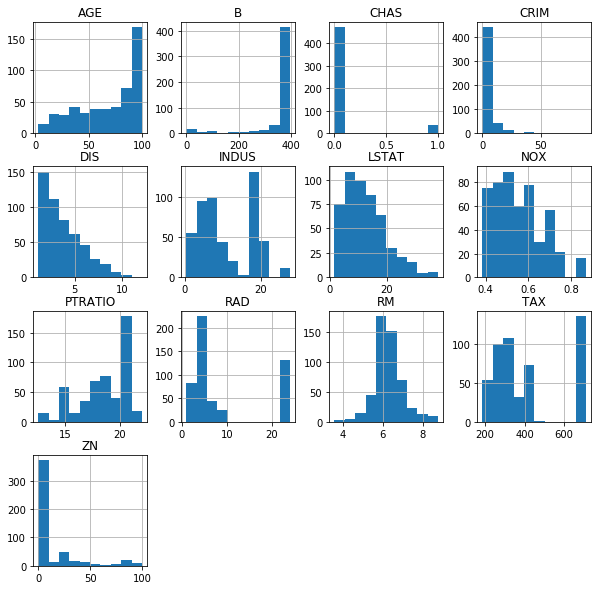

In [30]:
X.hist(X.columns, figsize=(10, 10));

In [35]:
Y = X.copy()
Y['target'] = y

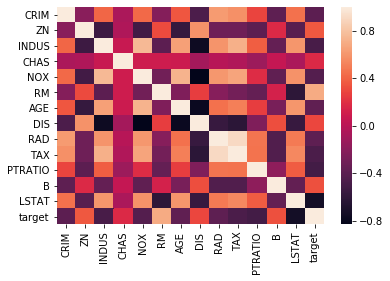

In [36]:
sns.heatmap(Y.corr())

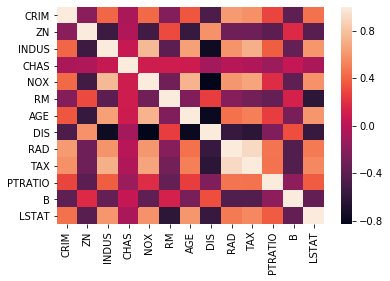

In [33]:
import seaborn as sns

sns.heatmap(X.corr())

In [31]:
X['DIS'] = np.log(X['DIS'])

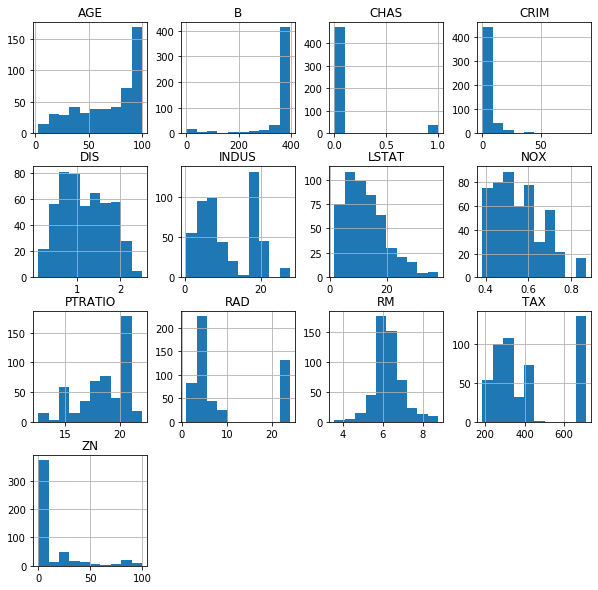

In [32]:
X.hist(X.columns, figsize=(10, 10));

Сделаем предсказание: какие факторы окажутся наиболее значимыми и в какую сторону?

## Обучение на реальных данных

Разобьём выборку на train и test в соотношении 70/30.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

Выполним нормировку данных

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Обучим линейную регрессию и подсчитаем её качество на тесте.

In [40]:
model = LinearRegression()

model.fit(X_train, y_train)

y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [41]:
print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))
print('Test MSE: ', mean_squared_error(y_test, y_test_prediction))

print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction))
print('Test MAE: ', mean_absolute_error(y_test, y_test_prediction))

print('Train r2: ', r2_score(y_train, y_train_prediction))
print('Test r2: ', r2_score(y_test, y_test_prediction))

Train MSE:  22.006909134766094
Test MSE:  16.799602273338305
Train MAE:  3.3346494261400172
Test MAE:  3.1760739289295565
Train r2:  0.7713853713291052
Test r2:  0.7015290222540743


Визуализируем получившиеся веса

In [42]:
print(house_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

<BarContainer object of 13 artists>

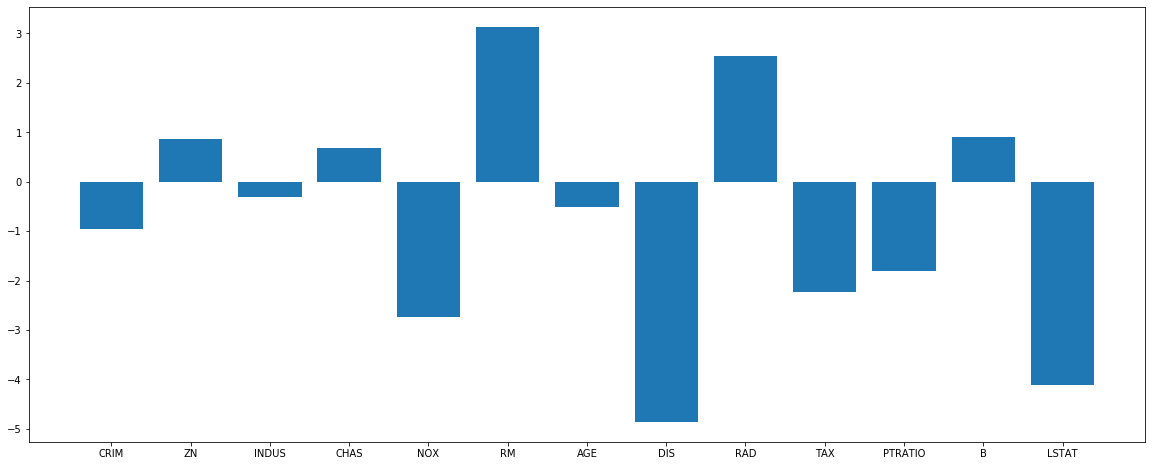

In [43]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, model.coef_)

Сделайте выводы. Какие факторы оказались самыми значимым? Какие оказались незначимыми? Подтвердились ли ваши догадки?

# Линейные методы классификации

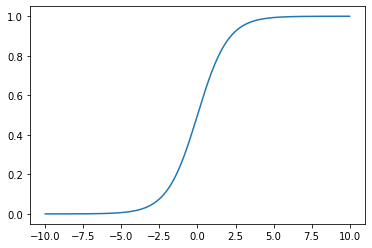

In [46]:
grid = np.linspace(-10, 10, 300)
plt.plot(grid, 1. / (1 + np.exp(-grid)))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Создадим два кластера с данными для решения задачи классификации.

In [47]:
from sklearn.datasets import make_blobs

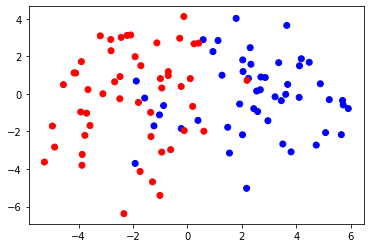

In [48]:
colors = ("red", "blue")
X, y = make_blobs(n_samples=100, centers=[[-2,0], [2,0]], random_state=20, cluster_std=2)

colored_y = np.zeros(y.size, dtype=str)
for i in range(2):
    colored_y[y == i] = colors[i]
    
plt.scatter(X[:, 0], X[:, 1], c=colored_y)

In [49]:
x_min, x_max = -12, 12
y_min, y_max = -10, 10
h = 0.05
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

## Обучим логистическую регрессию

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model = LogisticRegression()
model.fit(X, y)

/home/yury/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
model.coef_, model.intercept_

(array([[ 1.1329587 , -0.13728476]]), array([-0.10805809]))

Визуализируем предсказания

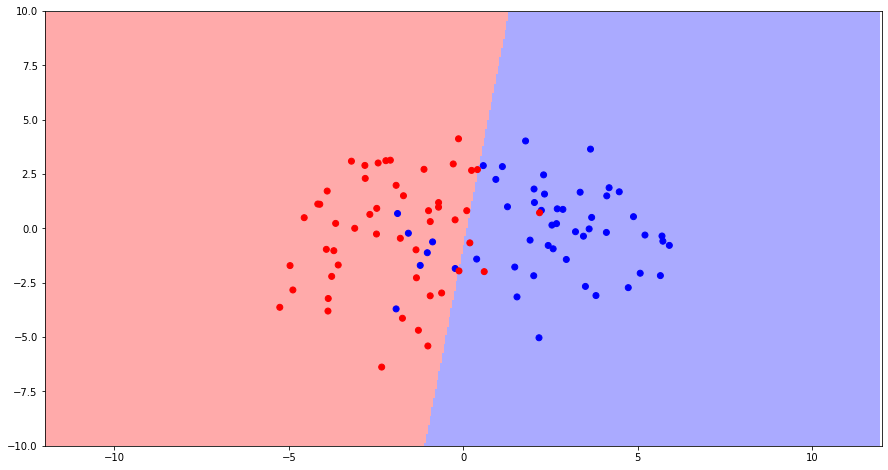

In [53]:
plt.figure(figsize=(15,8))

plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

## Реальный датасет

Рассмотрим работу алгоритмов линейной классификации для задачи breast cancer. Датасет содержит в себе данные о пациентках. Целевая переменная --- определить, болеет ли пациентка раком груди.

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
print(data['DESCR'])

In [ ]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

In [ ]:
np.unique(y, return_counts=True)

In [ ]:
X.info()

In [ ]:
X.head()

In [ ]:
sns.heatmap(X.corr())

Первый метод --- логистическая регрессия. Несмотря на название, данный метод применяется именно в задачах классификации. Регрессия служит указанием на то, что мы пытаемся предсказать вероятность принадлежности классу

## Логистическая регрессия

Разбейте выборку на трейн и тест в соотношении 4:1. Обучите модель и предскажите вероятности классов 0 и 1 (это можно сделать с помощью метода $\textbf{predict_proba}$)

In [ ]:
X_train, X_test, y_train, y_test = #Ваш код

In [ ]:
model = LogisticRegression()

#Ваш код

predictions = #Ваш код

In [ ]:
predictions.shape

Подсчитаем accuracy и roc-auc наших предсказаний

In [11]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score

In [ ]:
accuracy_score(y_test, predictions[:, 1] > 0.5)

In [ ]:
fpr, tpr, _ = roc_curve(y_test, predictions[:, 1])
auc = roc_auc_score(y_test, predictions[:, 1])

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.show()

In [ ]:
auc

# Предсказание отклика на маркетинговую кампанию

Возьмем датасет содержащий информацию о клиентах и маркетинговой кампании некоторого банка. Наша задача --- предсказать успешность кампании для каждого клиента. Признаками являются различные характеристики клиента и кампании.

Какие признаки вы бы использовали?

In [1]:
import pandas as pd

http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [2]:
# Считаем данные
data = pd.read_csv('bank-additional-full.csv', sep=';')

In [3]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
X = data.iloc[:, :-1].copy()
y = data.iloc[:, -1].copy()

# Бинаризуем таргет
from sklearn.preprocessing import LabelBinarizer
y = LabelBinarizer().fit_transform(y).ravel()

Классы очень несбалансированы:

In [7]:
y.mean()

0.11265417111780131

Заметим, что среди признаков достаточно много категориальных, в то время как линейные модели работают с числовыми признаками.

Одним из способов получить числовые значения категориальных параметров является One-hot encoding. Его суть состоит в том, что для каждого категориального признака $f$ и каждого его значения $v$ создается новый признак, который равен 1 если у объекта значение $f$ равно $v$ и 0 иначе.

One-hot encoding с помощью pandas можно сделать одной строчкой:

In [8]:
X = pd.get_dummies(X)

# Обратите внимание на признаки
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
age                              41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-employed

Разобьем выборку на трейн и тест

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Обучим линейный SVM с балансировкой классов

In [13]:
from sklearn.svm import SVC

In [14]:
model_svm = SVC(kernel='linear', class_weight='balanced')
model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)
print('Test accuracy: ', accuracy_score(y_test, y_pred))
print('Test F measure: ', f1_score(y_test, y_pred))

Test accuracy:  0.8829813061422676
Test F measure:  0.5700267618198037


In [15]:
from sklearn.metrics import precision_score, recall_score

In [16]:
print('Test precision measure: ', precision_score(y_test, y_pred))
print('Test recall measure: ', recall_score(y_test, y_pred))

Test precision measure:  0.494199535962877
Test recall measure:  0.6733403582718651


Обучим логистическую регрессию. Из-за несбалансированности классов порог нужно выставлять в зависимости от целей кампании

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_predicted = model_logistic.predict_proba(X_test)[:, 1]


/home/yury/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Построим график зависимости F-меры от порога положительного класса.

In [21]:
import numpy as np

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

/home/yury/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


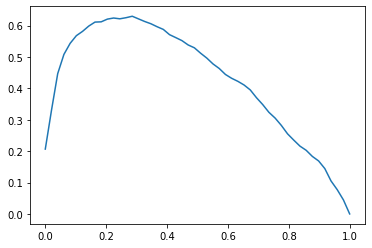

In [24]:
grid = np.linspace(0, 1, 50)
plt.plot(grid, [f1_score(y_test, y_predicted > item) for item in grid])

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve

In [28]:
x = roc_curve(y_test, y_predicted)

In [33]:
x[2]

array([1.99999989, 0.99999989, 0.99942959, ..., 0.01112077, 0.01110199,
       0.0020967 ])

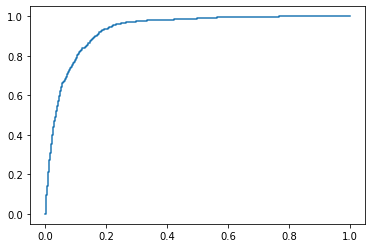

In [30]:
plt.plot(*(roc_curve(y_test, y_predicted)[0:2]))

In [ ]:
print('Test accuracy: ', accuracy_score(y_test, y_predicted > 0.2))
print('Test F measure: ', f1_score(y_test, y_predicted > 0.2))
print('Test ROC-AUC: ', roc_auc_score(y_test, y_predicted))